## Project Introduction: Predicting NBA Player Scoring Outcomes

The goal of this project is to solve a classification problem by predicting whether an NBA player will score more than 20 points in a game based on factors such as player performance statistics like rebounds, assists, shooting efficiency, and more.

By identifying patterns in player statistics, coaches and analysts can better understand which factors contribute most to scoring success. The specific questions I aim to answer through this project are:

What key performance metrics impact a player's scoring ability?

Can we accurately predict whether a player will score more than 20 points in a game based on historical game-by-game data?
How can the results be used to improve game strategies or scouting reports?


### Data Introduction: NBA Player Performance Dataset

For this project, I am using the NBA Player Performance Dataset, which contains detailed player statistics for each game across multiple seasons. This dataset was collected from numerous games and includes performance metrics such as points scored, rebounds, assists, and advanced statistics like usage rate and true shooting percentage. These features may help predict whether a player will exceed 20 points in a game.

The main features of the dataset include:

reb (Rebounds): Number of total rebounds per game.

ast (Assists): Number of assists per game.

net_rating: A player's net rating, reflecting their overall impact on the game.

usg_pct (Usage Percentage): The percentage of the team's offensive plays a player is involved in while on the court.

ts_pct (True Shooting Percentage): A measure of a player's shooting efficiency.

pts (Points): Number of points scored in the game, which will be used to derive the target variable.


## Project Introduction: Predicting NBA Player Scoring Outcomes

The goal of this project is to solve a classification problem by predicting whether an NBA player will score more than 20 points in a game based on factors such as player performance statistics like rebounds, assists, shooting efficiency, and more.

By identifying patterns in player statistics, coaches and analysts can better understand which factors contribute most to scoring success. The specific questions I aim to answer through this project are:

What key performance metrics impact a player's scoring ability?

Can we accurately predict whether a player will score more than 20 points in a game based on historical game-by-game data?
How can the results be used to improve game strategies or scouting reports?


Data Introduction: NBA Player Performance Dataset

For this project, I am using the NBA Player Performance Dataset, which contains detailed player statistics for each game across multiple seasons. This dataset was collected from numerous games and includes performance metrics such as points scored, rebounds, assists, and advanced statistics like usage rate and true shooting percentage. These features may help predict whether a player will exceed 20 points in a game.

The main features of the dataset include:

reb (Rebounds): Number of total rebounds per game.
ast (Assists): Number of assists per game.
net_rating: A player's net rating, reflecting their overall impact on the game.
usg_pct (Usage Percentage): The percentage of the team's offensive plays a player is involved in while on the court.
ts_pct (True Shooting Percentage): A measure of a player's shooting efficiency.
pts (Points): Number of points scored in the game, which will be used to derive the target variable.



In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


file_path = '/Users/devamin/Desktop/3162-Project2/all_seasons.csv'
df = pd.read_csv(file_path)


selected_columns = ['ast', 'net_rating', 'usg_pct', 'ts_pct', 'pts']
data_selected = df[selected_columns].copy()  # Use .copy() to avoid view/copy warnings


missing_values = data_selected.isnull().sum()
print("Missing values in the dataset:\n", missing_values)


data_selected.fillna(data_selected.mean(), inplace=True)


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_selected.drop(columns='pts'))  # Scaling all except 'pts'


data_scaled = pd.DataFrame(scaled_features, columns=['ast', 'net_rating', 'usg_pct', 'ts_pct'])


data_scaled['pts'] = data_selected['pts'].values


Q1 = data_scaled.quantile(0.25)
Q3 = data_scaled.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data_capped = data_scaled.clip(lower=lower_bound, upper=upper_bound, axis=1)


print(data_capped.head())


Missing values in the dataset:
 ast           0
net_rating    0
usg_pct       0
ts_pct        0
pts           0
dtype: int64
        ast  net_rating  usg_pct    ts_pct   pts
0  0.205128    0.455091    0.169  0.324667   3.9
1  0.025641    0.470727    0.174  0.331333   3.8
2  0.162393    0.439636    0.175  0.341333   8.3
3  0.145299    0.449636    0.206  0.351333  10.2
4  0.025641    0.428909    0.195  0.333333   2.8


Pre-Processing the Data

1. Selecting Relevant Features:
As mentioned, only the following features will be used in the dataset for predicting whether a player scores more than 20 points in a game:

    ast (Assists): Number of assists per game.

    net_rating: A player's net rating, reflecting their overall impact on the game.

    usg_pct (Usage Percentage): The percentage of the team's offensive plays a player is involved in while on the court.

    ts_pct (True Shooting Percentage): A measure of a player's shooting efficiency.

    pts (Points): Number of points scored in the game (used to derive the target variable).


2. Handling Missing Values:
   
    Check for Missing Data: First, we will check for any missing or null values in the selected columns. Missing values can negatively impact model performance.
    
    Impute or Remove Missing Data: If any missing values are found, we will either remove the affected rows or fill them using statistical methods like median or mean imputation, depending on the distribution of the data.

3. Scaling of Numerical Features:
   
    Standardizing/Normalizing Features: Although decision tree-based algorithms (like Random Forest or Gradient Boosting) are less sensitive to scaling, it is good practice to scale the numerical features (e.g., ast, net_rating, usg_pct, ts_pct) to ensure the model performs optimally, especially if we plan to use other models like logistic regression or support vector machines.
Normalization/Min-Max Scaling: Scaling techniques like Min-Max scaling can be applied to bring all features within a similar range, making it easier for some models to converge.

4. Handling Outliers:
   
    Identify and Address Outliers: Investigate potential outliers in key metrics such as assists (ast), usage percentage (usg_pct), and true shooting percentage (ts_pct). Outliers can skew the model's results, and handling them properly (by capping or removing extreme values) can improve model performance.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the target variable: 1 if pts > 20, 0 otherwise
data_capped['target'] = (data_capped['pts'] > 20).astype(int)

# Define features and target
X = data_capped.drop(columns=['pts', 'target'])  # Features (scaled features except 'pts' and 'target')
y = data_capped['target']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f'KNN Classifier Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


KNN Classifier Accuracy: 97.20%
Confusion Matrix:
 [[2388   30]
 [  42  109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2418
           1       0.78      0.72      0.75       151

    accuracy                           0.97      2569
   macro avg       0.88      0.85      0.87      2569
weighted avg       0.97      0.97      0.97      2569



## StoryTelling 

The KNN model excels in predicting NBA player performance, with an overall accuracy of 97.20%. The model is particularly effective at identifying players who score 20 points or fewer, making very few errors in this category. However, the model shows a slight weakness in catching all players who score more than 20 points, as indicated by a recall of 72% for high scorers. Despite this, the precision for high scorers is relatively strong at 78%, showing that the model is better at avoiding false positives than false negatives.

Overall, the KNN model offers a reliable method for predicting player scoring, especially in distinguishing low scorers from high scorers. The model's performance highlights the importance of fine-tuning for further improving recall for players who score above 20 points.

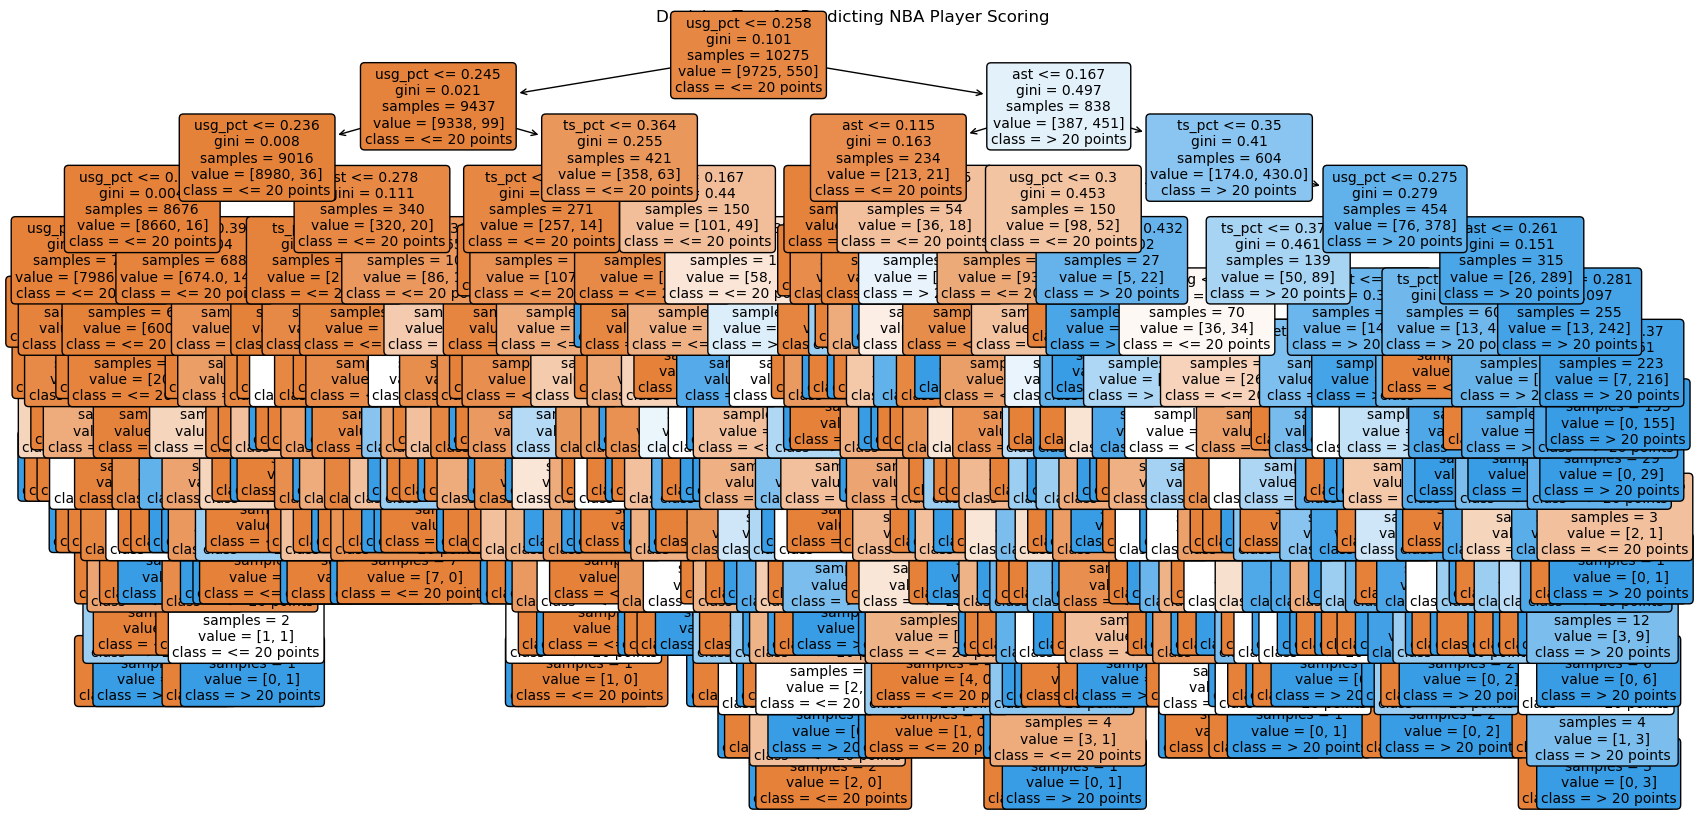

Decision Tree Classifier Accuracy: 96.15%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2418
           1       0.68      0.66      0.67       151

    accuracy                           0.96      2569
   macro avg       0.83      0.82      0.82      2569
weighted avg       0.96      0.96      0.96      2569

Confusion Matrix:
[[2371   47]
 [  52   99]]
Feature Importance:
ast: 0.2012
net_rating: 0.1018
usg_pct: 0.5296
ts_pct: 0.1674


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=["<= 20 points", "> 20 points"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree for Predicting NBA Player Scoring')
plt.show()


y_pred_tree = clf.predict(X_test)


accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Classifier Accuracy: {accuracy_tree * 100:.2f}%')


print('Classification Report:')
print(classification_report(y_test, y_pred_tree))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_tree))

print('Feature Importance:')
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f'{feature}: {importance:.4f}')


## Storytelling:

Top-Level Split (Usage Percentage):

The most important feature is usage percentage (usg_pct). Players with a usg_pct ≤ 0.236 are predicted to score fewer than 20 points, while those with a usg_pct > 0.236 are more likely to score over 20 points.

Further Splits:

For players with usg_pct > 0.245, the model looks at true shooting percentage (ts_pct). Players with ts_pct > 0.356 are highly likely to score more than 20 points.

For lower usg_pct, assists (ast) and ts_pct further refine predictions: more assists and higher shooting efficiency lead to a greater likelihood of scoring above 20 points.

### Performance Metrics:

Accuracy: The model is highly accurate, with 96.15% overall accuracy.

Confusion Matrix: The model correctly predicted that 2371 players would score fewer than 20 points (true negatives), but missed 52 players who scored more than 20 points (false negatives). It also correctly identified 99 high-scorers (true positives) but made 47 false positives.
Precision and Recall:
Class 0 (≤ 20 points): Precision and recall are both at 98%, indicating excellent performance.
Class 1 (> 20 points): Precision is 68% and recall is 66%, meaning the model is fairly good but occasionally misses some high scorers.

The decision tree clearly shows that usage percentage is the most critical factor for predicting whether a player will score more than 20 points. Players who are more involved in offensive plays tend to score higher. For players with higher usage, shooting efficiency and assists further improve the likelihood of scoring above 20 points. The model is especially strong at identifying low scorers, with nearly perfect accuracy in that category, while slightly less precise at identifying high scorers, which leaves room for refinement.

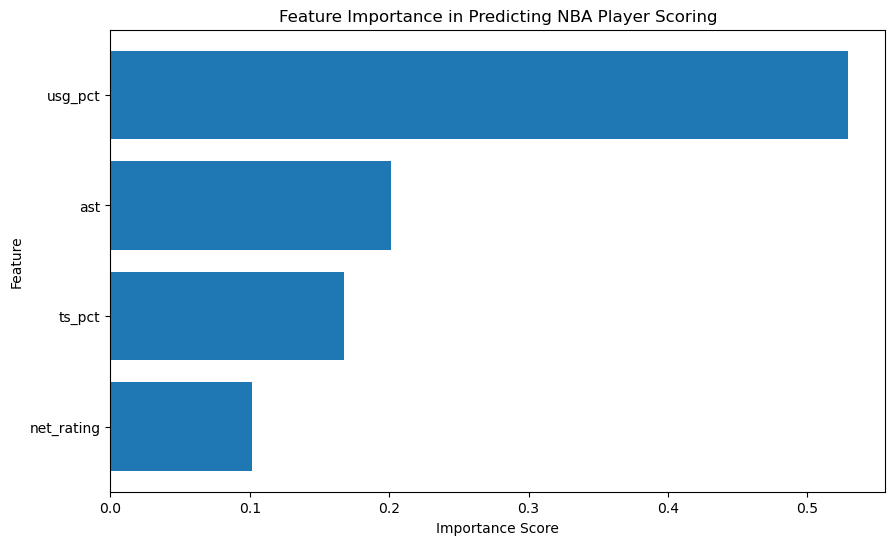

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_

indices = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting NBA Player Scoring')
plt.show()


## Storytelling:

The usage percentage dominates the model's predictions, showing that players who are heavily involved in their team's offensive plays are much more likely to score over 20 points. This reinforces the idea that high involvement in offensive actions leads to more scoring opportunities.

Assists come next in importance, suggesting that players who create opportunities for others are also likely to score well themselves. This can be attributed to their integral role in offensive flow, both as facilitators and scorers.

Shooting efficiency (ts_pct) further refines the model’s predictions. Players who make the most of their scoring chances, regardless of shot type, are more likely to cross the 20-point threshold.

Net rating is important in terms of a team, but just predicting how many points a player is going to score, net rating isn't an important part of that. A good example I use to prove that is when Devin Booker scored 70 points against the Celtics on March 25th, 2017 but still had a net rating of -6. 

In conclusion, this feature importance chart emphasizes that a player's involvement in offensive plays (usage percentage) is the key factor in determining whether they will score more than 20 points, with assists and shooting efficiency acting as secondary predictors.

## Impact Section

The impact of this project extends beyond just predicting whether an NBA player will score more than 20 points. By identifying key performance metrics like usage percentage, assists, and shooting efficiency, teams and coaches can make data-driven decisions that enhance game strategy and player development. For instance, understanding that usage percentage is the most critical factor for high-scoring performance allows coaches to focus on involving key players in more offensive actions or adjusting game plans to maximize scoring potential. This insight can help teams make better-informed decisions when designing plays, assigning roles, and managing player rotations.

However, there are ethical considerations that come with using such predictive models. By focusing on specific offensive metrics, models could unintentionally undervalue players who contribute in other ways, such as on defense or through leadership. Additionally, labeling players as "high" or "low" scorers based on model predictions could influence team expectations, contract negotiations, or playing time, potentially creating unintended biases. Therefore, while this project has the potential to significantly improve performance evaluation and strategy in professional basketball, it must be applied thoughtfully to ensure fairness and to avoid over-reliance on any single metric.